# Recommender System for Diversity Personalization

In [1]:
# Import libraries
import pandas as pd 

In [ ]:
import numpy as np 
import os

### Data analysis

In [2]:
# Load book data from csv
books = pd.read_csv('../data/books.csv')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [3]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [ ]:
# books = books.drop(columns=['isbn', 'isbn13', 'image_url', 'small_image_url'])
# books

In [ ]:
# Load ratings data from csv
ratings = pd.read_csv('../data/ratings.csv')
ratings

In [4]:
# Load book_tags data from csv
book_tags = pd.read_csv('../data/book_tags.csv')
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [5]:
# Load tag data from csv
tags = pd.read_csv('../data/tags.csv')
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [6]:
# Merge book_tags and tags 
tags_join = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
...,...,...,...,...
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author


In [7]:
# Sort by book
tags_join.sort_values(by=['goodreads_book_id'])

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile
...,...,...,...,...
918363,33288638,2541,9,angsty
956326,33288638,1126,7,5-star-reads
358501,33288638,18680,11,loved
954279,33288638,29125,10,sweet-romance


In [8]:
# Load to_read data from csv. This shows which book a user has tagged as 'to read'.
to_read = pd.read_csv('../data/to_read.csv')
to_read

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874
...,...,...
912700,53424,4716
912701,53424,4844
912702,53424,5907
912703,53424,7569


In [9]:
# Merge tags_join and books
books_with_tags = pd.merge(books, tags_join, left_on='book_id', right_on='goodreads_book_id', how='inner')
books_with_tags

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,33114,25968,young-adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999907,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,16529,4,john-keegan
999908,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32805,3,world-war
999909,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32156,3,war-ww1
999910,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,20285,3,modern-european-history


In [14]:
# Display non-truncated columns
pd.set_option('display.max_colwidth', -1)

In [10]:
# Store tags into the same book id row
temp_df = books_with_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head(5)

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...


In [11]:
# Merge tag_names back into books
books = pd.merge(books, temp_df, left_on='book_id', right_on='book_id', how='inner')

In [12]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,to-read favorites currently-reading young-adul...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,to-read favorites currently-reading young-adul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,to-read fantasy favorites currently-reading fi...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read favorites currently-reading books-i-ow...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,to-read favorites currently-reading fiction bo...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,to-read favorites currently-reading books-i-ow...


In [15]:
books['tag_name']

0       to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites re-read adventure sci-fi-fantasy all-time-favorites default my-books reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library ya-fantasy teen english books ya-fiction my-favorites own-it library audio young-adult-fiction novel scifi-fantasy faves favorite-series shelfari-favorites kindle romance favourite to-buy read-in-2014 ebook contemporary 5-star coming-of-age favourite-books favs action read-in-2013 read-in-2011 finished ya-books borrowed sci-fi ya-lit loved love thriller science-fiction finished-series action-adventure scifi sf book-club speculative-fiction ebooks e-book read-in-2012 read-in-2010 survival future drama reviewed suspense dystopia dystopian post-apocalyptic read-2012 dystopias dystopian-fiction distopia distopian read-2011 teen-fiction 2012-reads futuristic ya-dystopian trilogy completed-series l

### Feature engineering and machine learning algorithm

* Use TfidVectorizer to transform text to feature vectors
* Use Cosine Similarity to calculate numeric values that denote the similarity between books

In [24]:
# Use TfidVectorizer to transform text to feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['tag_name'])
tfidf_matrix
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# Use Cosine Similarity to calculate numeric values that denote the similarity between books
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.23560979, 0.28324674, ..., 0.05084198, 0.07947133,
        0.01691533],
       [0.23560979, 1.        , 0.22459026, ..., 0.0530554 , 0.07126569,
        0.02330787],
       [0.28324674, 0.22459026, 1.        , ..., 0.03356699, 0.04251551,
        0.01473002],
       ...,
       [0.05084198, 0.0530554 , 0.03356699, ..., 1.        , 0.0262993 ,
        0.07240815],
       [0.07947133, 0.07126569, 0.04251551, ..., 0.0262993 , 1.        ,
        0.07219924],
       [0.01691533, 0.02330787, 0.01473002, ..., 0.07240815, 0.07219924,
        1.        ]])

In [55]:
# Function that gets book recommendations based on the cosine similarity score of book tags

# Build a 1-dimensional array with book titles
titles = books['title']
tag_name = books['tag_name']
indices = pd.Series(books.index, index=books['title'])

def tags_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:] # How many results to display
    book_indices = [i[0] for i in sim_scores]
    title_df = pd.DataFrame({'title': titles.iloc[book_indices].tolist(),
                           'similarity': [i[1] for i in sim_scores],
                            'tag_name': tag_name.iloc[book_indices].tolist()}, 
                           index=book_indices)
    return title_df

# Function that gets book tags and stats
def recommend_stats(target_book_title):
    
    # Get recommended books
    rec_df = tags_recommendations(target_book_title)
    
    # Get tags of the target book
    rec_book_tags = books_with_tags[books_with_tags['title'] == target_book_title]['tag_name'].to_list()
    
    # Create dictionary of tag lists by book title
    book_tag_dict = {}
    for title in rec_df['title'].tolist():
        book_tag_dict[title] = books_with_tags[books_with_tags['title'] == title]['tag_name'].to_list()
    
    # Create dictionary of tag statistics by book title
    tags_stats = {}
    for book, tags in book_tag_dict.items():
        tags_stats[book] = {}
        tags_stats[book]['total_tags'] = len(tags)
        same_tags = set(rec_book_tags).intersection(set(tags)) # Get tags in recommended book that are also in target book
        tags_stats[book]['%_common_tags'] = (len(same_tags) / len(tags)) * 100
    
    # Convert dictionary to dataframe
    tags_stats_df = pd.DataFrame.from_dict(tags_stats, orient='index').reset_index().rename(columns={'index': 'title'})
    
    # Merge tag statistics dataframe to recommended books dataframe
    all_stats_df = pd.merge(rec_df, tags_stats_df, on='title')
    return all_stats_df

In [31]:
# Displays all rows without truncating
# pd.set_option('display.max_rows', None)

# Display all columns with/without truncating (use "set" or "reset")
pd.reset_option('display.max_colwidth')

In [56]:
lor_recs = recommend_stats('The Fellowship of the Ring (The Lord of the Rings, #1)')
lor_recs

,title,similarity,tag_name,total_tags,%_common_tags
0,The Fellowship of the Ring (The Lord of the Ri...,1.000000,to-read fantasy favorites currently-reading yo...,100,100.0
1,"The Return of the King (The Lord of the Rings,...",0.865246,to-read fantasy favorites currently-reading yo...,100,92.0
2,"The Two Towers (The Lord of the Rings, #2)",0.846638,to-read fantasy favorites currently-reading yo...,100,90.0
3,"The Lord of the Rings (The Lord of the Rings, ...",0.676849,to-read fantasy favorites currently-reading yo...,100,84.0
4,The Silmarillion (Middle-Earth Universe),0.638828,to-read fantasy favorites currently-reading yo...,100,77.0
...,...,...,...,...,...
9995,Maryamah Karpov: Mimpi-mimpi Lintang (Tetralog...,0.012938,to-read favorites currently-reading young-adul...,100,16.0
9996,The Power of Art,0.012782,to-read favorites currently-reading default en...,100,8.0
9997,Veganomicon: The Ultimate Vegan Cookbook,0.011444,to-read favorites currently-reading books-i-ow...,100,16.0
9998,Edvard Munch: 1863-1944 (Basic Art),0.011206,to-read favorites currently-reading books-i-ow...,100,8.0


In [42]:
recommend_stats('The Fellowship of the Ring (The Lord of the Rings, #1)')

,title,similarity,total_tags,%_common_tags
0,"The Return of the King (The Lord of the Rings,...",0.865246,100,92.0
1,"The Two Towers (The Lord of the Rings, #2)",0.846638,100,90.0
2,"The Lord of the Rings (The Lord of the Rings, ...",0.676849,100,84.0
3,The Silmarillion (Middle-Earth Universe),0.638828,100,77.0
4,The Hobbit,0.598920,100,76.0
5,The Children of Húrin,0.537546,100,67.0
6,Unfinished Tales of Númenor and Middle-Earth,0.532336,100,65.0
7,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,0.514953,100,59.0
8,The Hobbit: Graphic Novel,0.486699,100,59.0
9,"Pawn of Prophecy (The Belgariad, #1)",0.424535,100,61.0


In [101]:
# Calculate statistical data
lor_recs.describe()

,similarity,total_tags,%_common_tags
count,10000.000000,10000.000000,10000.000000
mean,0.102232,100.791200,32.274768
std,0.074764,10.475045,8.876842
min,0.010575,56.000000,4.000000
25%,0.051356,100.000000,26.000000
50%,0.077337,100.000000,32.000000
75%,0.128055,100.000000,38.000000
max,1.000000,400.000000,100.000000


In [64]:
# Find Zero to One book
lor_recs[lor_recs.title == 'Zero to One: Notes on Startups, or How to Build the Future']

,title,similarity,tag_name,total_tags,%_common_tags
8592,"Zero to One: Notes on Startups, or How to Buil...",0.040449,to-read favorites currently-reading books-i-ow...,100,23.0


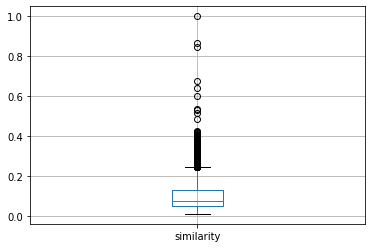

In [68]:
# Boxplot of similarity score
import matplotlib.pyplot as plt
lor_recs.boxplot(column=['similarity'])
plt.show()

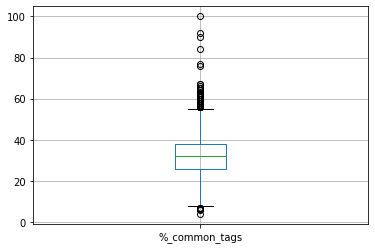

In [63]:
# Boxplot of percentage of common tags
lor_recs.boxplot(column=['%_common_tags'])
plt.show()

In [70]:
import seaborn as sns
lor_recs.distplot(column=['similarity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

AttributeError: 'DataFrame' object has no attribute 'distplot'

### Reverse engineer

In [83]:
# Filter by unlike words
lor_recs_filter = lor_recs[(lor_recs['tag_name'].str.contains('non-fiction')) & (lor_recs['tag_name'].str.contains('economics')) & (lor_recs['tag_name'].str.contains('entrepreneurial'))]
lor_recs_filter

In [94]:
lor_recs_filter

,title,similarity,tag_name,total_tags,%_common_tags
8592,"Zero to One: Notes on Startups, or How to Buil...",0.040449,to-read favorites currently-reading books-i-ow...,100,23.0
8683,The $100 Startup: Reinvent the Way You Make a ...,0.039505,to-read favorites currently-reading books-i-ow...,100,22.0
8865,The Dip: A Little Book That Teaches You When t...,0.037474,to-read favorites currently-reading books-i-ow...,100,23.0
9562,The Lean Startup: How Today's Entrepreneurs Us...,0.028992,to-read favorites currently-reading books-i-ow...,100,24.0
9759,"The Art of the Start: The Time-Tested, Battle-...",0.024674,to-read favorites currently-reading books-i-ow...,100,22.0
9796,The E-Myth Revisited: Why Most Small Businesse...,0.023662,to-read favorites currently-reading books-i-ow...,100,22.0
9920,Business Model Generation,0.019297,to-read favorites currently-reading books-i-ow...,100,20.0


In [98]:
# Merge recommendations with ratings
lor_recs_filter_merge = pd.merge(books[['title', 'average_rating']], lor_recs_filter, left_on='title', right_on='title', how='inner')
lor_recs_filter_merge

,title,average_rating,similarity,tag_name,total_tags,%_common_tags
0,The Lean Startup: How Today's Entrepreneurs Us...,4.04,0.028992,to-read favorites currently-reading books-i-ow...,100,24.0
1,"Zero to One: Notes on Startups, or How to Buil...",4.17,0.040449,to-read favorites currently-reading books-i-ow...,100,23.0
2,The E-Myth Revisited: Why Most Small Businesse...,3.98,0.023662,to-read favorites currently-reading books-i-ow...,100,22.0
3,The $100 Startup: Reinvent the Way You Make a ...,3.85,0.039505,to-read favorites currently-reading books-i-ow...,100,22.0
4,Business Model Generation,4.16,0.019297,to-read favorites currently-reading books-i-ow...,100,20.0
5,"The Art of the Start: The Time-Tested, Battle-...",3.82,0.024674,to-read favorites currently-reading books-i-ow...,100,22.0
6,The Dip: A Little Book That Teaches You When t...,3.83,0.037474,to-read favorites currently-reading books-i-ow...,100,23.0


In [100]:
# Merge recommendations with ratings
lor_recs_filter_merge = pd.merge(books[['title', 'average_rating']], lor_recs_filter, left_on='title', right_on='title', how='inner')

# Sort by highest average rating
lor_recs_filter_merge = lor_recs_filter_merge.sort_values(by=['average_rating'], ascending=False)
lor_recs_filter_merge

,title,average_rating,similarity,tag_name,total_tags,%_common_tags
1,"Zero to One: Notes on Startups, or How to Buil...",4.17,0.040449,to-read favorites currently-reading books-i-ow...,100,23.0
4,Business Model Generation,4.16,0.019297,to-read favorites currently-reading books-i-ow...,100,20.0
0,The Lean Startup: How Today's Entrepreneurs Us...,4.04,0.028992,to-read favorites currently-reading books-i-ow...,100,24.0
2,The E-Myth Revisited: Why Most Small Businesse...,3.98,0.023662,to-read favorites currently-reading books-i-ow...,100,22.0
3,The $100 Startup: Reinvent the Way You Make a ...,3.85,0.039505,to-read favorites currently-reading books-i-ow...,100,22.0
6,The Dip: A Little Book That Teaches You When t...,3.83,0.037474,to-read favorites currently-reading books-i-ow...,100,23.0
5,"The Art of the Start: The Time-Tested, Battle-...",3.82,0.024674,to-read favorites currently-reading books-i-ow...,100,22.0


In [88]:
lor_recs_filter_merge.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'tag_name_x', 'similarity', 'tag_name_y',
       'total_tags', '%_common_tags'],
      dtype='object')

In [ ]:
# # Select rows with similarity values between 0.035 to 0.045 and % common tags between 20 to 25
# # Zero to One: similarity 0.040449, % common tags 23

# lor_recs_filter = lor_recs.loc[(lor_recs['similarity'] >= 0.010575) & (lor_recs['similarity'] <= 0.051354) & (lor_recs['%_common_tags'] >= 22) & (lor_recs['%_common_tags'] <= 23)]
# lor_recs_filter

In [ ]:
# # Merge recommendations with ratings
# recs_merge = pd.merge(books, lor_recs, left_on='title', right_on='title', how='inner')
# recs_merge

In [ ]:
# recs_merge = recs_merge.drop(columns=['best_book_id', 'work_id', 'isbn', 'isbn13', 'image_url', 'small_image_url', 'tag_name_y'])
# recs_merge

In [ ]:
# # Filter tags unlike most frequent book tag (in this case: 'non-fiction', 'economics' and 'entrepreneurial')
# lor_recs_filter = recs_merge[(recs_merge['tag_name_x'].str.contains('non-fiction')) & (recs_merge['tag_name_x'].str.contains('economics')) & (recs_merge['tag_name_x'].str.contains('entrepreneurial'))] 

In [ ]:
# # pd.reset_option('display.max_colwidth')
# pd.set_option('display.max_rows', 400)
# lor_recs_filter = lor_recs_filter.sort_values(by=['average_rating'], ascending=False)
# lor_recs_filter

### Explore the book data

In [ ]:
# Use TfidVectorizer to transform text to feature vectors
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['tag_name'])

# Find the index of Lord of the Rings
tfidf_matrix[1]

# Find the index of Zero to One
tfidf_matrix[2]

# tfidf_matrix['index']   # will output row of tfidf values

tf.get_feature_names()

In [ ]:
tfidf_matrix[1].todense()

In [ ]:
tfidf_matrix[2].todense()

In [ ]:
tf.get_feature_names()

In [ ]:
matrix_df = pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(), index=books['title'])

In [ ]:
matrix_df

In [ ]:
matrix_df['title'].dtype

In [ ]:
# Convert to string
matrix_df['title'] = matrix_df.title.astype(str)

In [ ]:
matrix_df['title'].dtype

In [ ]:
matrix_df[matrix_df['title'].str.match('The Great Gatsby')]

In [ ]:
matrix_df.iloc[18]

In [ ]:
matrix_df.iloc[2165]

In [ ]:
compare_df = matrix_df.iloc[[18,2165]]
compare_df

In [ ]:
compare_df_filter = compare_df.loc[:, (compare_df != 0).any(axis=0)]

In [ ]:
compare_df_filter

In [ ]:
compare_df[compare_df > 0]

In [ ]:
matrix_df.iloc[18].isin(matrix_df.iloc[2165]).value_counts(normalize=True)

In [72]:
# Book tags for Lord of the Rings
lor_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='The Fellowship of the Ring (The Lord of the Rings, #1)']['tag_name'])
lor_tags

,tag_name
1800,to-read
1801,fantasy
1802,favorites
1803,currently-reading
1804,young-adult
...,...
1895,fantasy-science-fiction
1896,elves
1897,tolkien
1898,fantasía


All frequencies, including STOPWORDS:
        Word  Frequency
0    fantasy         12
1    fiction          8
2       read          7
3      books          6
4         my          5
5  favorites          4
6        sci          4
7         fi          4
8         to          3
9      adult          3


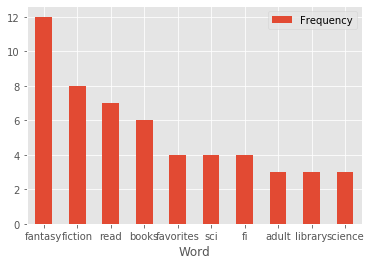

In [80]:
# Find most frequent word used in tags
import matplotlib
import nltk

top_N = 10
txt = lor_tags.tag_name.str.lower().str.replace(r'-', ' ').str.cat(sep=' ') # Remove hyphens
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
print('All frequencies, including STOPWORDS:')
print('=' * 60)
lor_rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(lor_rslt)
print('=' * 60)
lor_rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')

lor_rslt.plot.bar(rot=0)
plt.show()

In [ ]:
zero_rslt

In [ ]:
top_N = 50

txt = lor_recs.tag_name.str.lower().str.replace(r'-', ' ').str.cat(sep=' ') # Remove hyphens
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)
plt.show()

In [ ]:
lord_of_the_rings_tags.tag_name.mode()

In [81]:
# Book tags for Zero to One
zero_to_one_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='Zero to One: Notes on Startups, or How to Build the Future']['tag_name'])
zero_to_one_tags

,tag_name
216462,to-read
216463,favorites
216464,currently-reading
216465,books-i-own
216466,owned
...,...
216557,elon-musk
216558,entrepreneurial
216559,start-ups
216560,enterpreneurship


All frequencies, including STOPWORDS:
                Word  Frequency
0               read         15
1           business         11
2                 to          9
3              books          6
4                non          3
..               ...        ...
87   entrepreneurial          1
88               ups          1
89  enterpreneurship          1
90             skimm          1
91             reads          1

[92 rows x 2 columns]


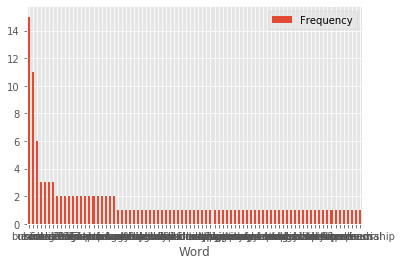

In [82]:
# Find most frequent word used in tags
import nltk

top_N = 100
txt = zero_to_one_tags.tag_name.str.lower().str.replace(r'-', ' ').str.cat(sep=' ') # Remove hyphens
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
print('All frequencies, including STOPWORDS:')
print('=' * 60)
zero_rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(zero_rslt)
print('=' * 60)
zero_rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')

zero_rslt.plot.bar(rot=0)
plt.show()

In [ ]:
# Concat 

df2_concat = pd.concat([lor_rslt,zero_rslt])
df2_concat

In [ ]:
# Book tag for other  book
startup_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='Bossypants']['tag_name'])
startup_tags

In [ ]:
# Check commonalities and differences within each
# False = different
# True = common
lord_of_the_rings_tags['tag_name'].isin(zero_to_one_tags['tag_name']).value_counts(normalize=True)

In [ ]:
# Concat the two dataframes

df_concat = pd.concat([lord_of_the_rings_tags,zero_to_one_tags])
df_concat

In [ ]:
df_concat[df_concat.duplicated(['tag_name'], keep=False)]

In [ ]:
# Check commonalities and differences within each
# False = different
# True = common
lord_of_the_rings_tags['tag_name'].isin(startup_tags['tag_name']).value_counts(normalize=True)

In [ ]:
# Concatenate the two dataframes
df_diff = pd.concat([lord_of_the_rings_tags,zero_to_one_tags]).drop_duplicates(keep=False)
pd.set_option('display.max_rows', 160)
df_diff

In [ ]:
df_diff = pd.concat([lord_of_the_rings_tags, zero_to_one_tags]).loc[lord_of_the_rings_tags.index.symmetric_difference(zero_to_one_tags.index)]
df_diff.tail(60)

### Find opposite of a word

In [ ]:
import nltk 
from nltk.corpus import wordnet 

In [ ]:
synonyms = [] 
antonyms = [] 
  
for syn in wordnet.synsets('nice'): 
    for l in syn.lemmas(): 
        synonyms.append(l.name()) 
        if l.antonyms(): 
            antonyms.append(l.antonyms()[0].name()) 
  
print(set(antonyms))

In [ ]:
#Checking antonym for the word "increase"
from nltk.corpus import wordnet
antonyms = []
for syn in wordnet.synsets("book"):
    for lm in syn.lemmas():
        if lm.antonyms():
            antonyms.append(lm.antonyms()[0].name()) #adding into antonyms
print(set(antonyms))

### Filter for opposite of most frequent tag

In [ ]:
# Displays all rows without truncating
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows', None)

pd.DataFrame(books_with_tags[books_with_tags['title']=='The Complete Guide to Middle-Earth']['tag_name'])

In [ ]:
lor_recs_filter_business = lor_recs[lor_recs['tag_name'].str.contains("nonfiction")]
lor_recs_filter_business

In [ ]:
newdf = lor_recs[lor_recs['tag_name'] != 'fantasy'